<a href="https://colab.research.google.com/github/khamzovich/Statistics_Stepik_Karpov/blob/main/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8_2_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import math

from itertools import product
from scipy import stats
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mount drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Конспект от Фёкла_Борщова](https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/Math_Stat_1_2.ipynb)

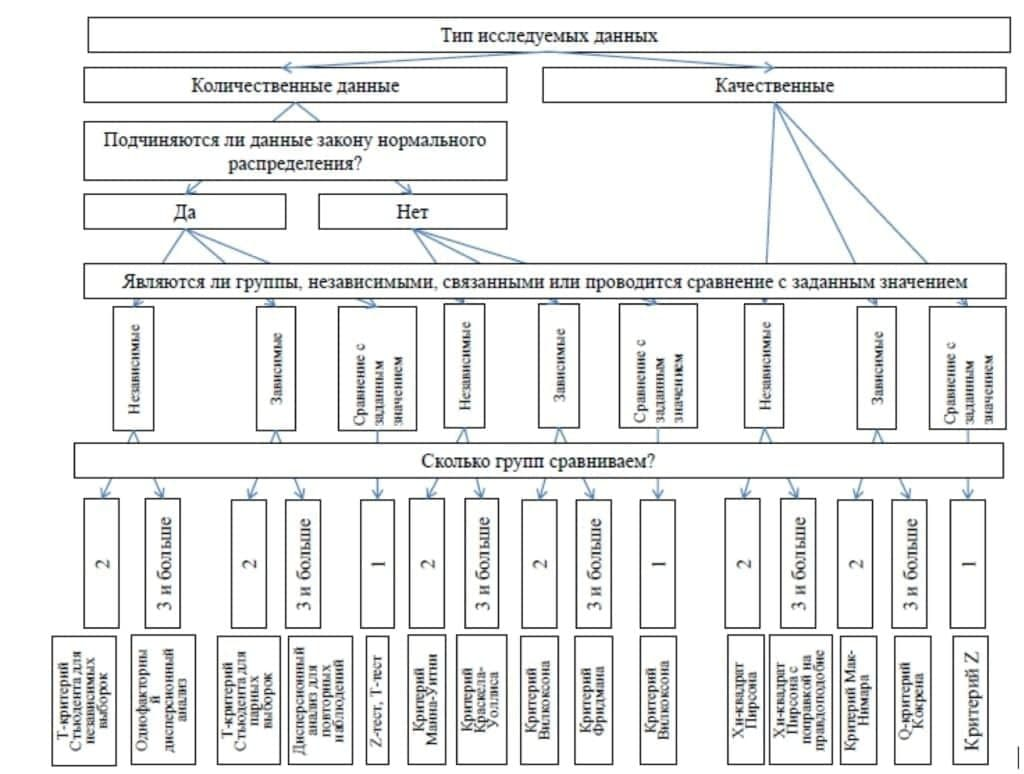

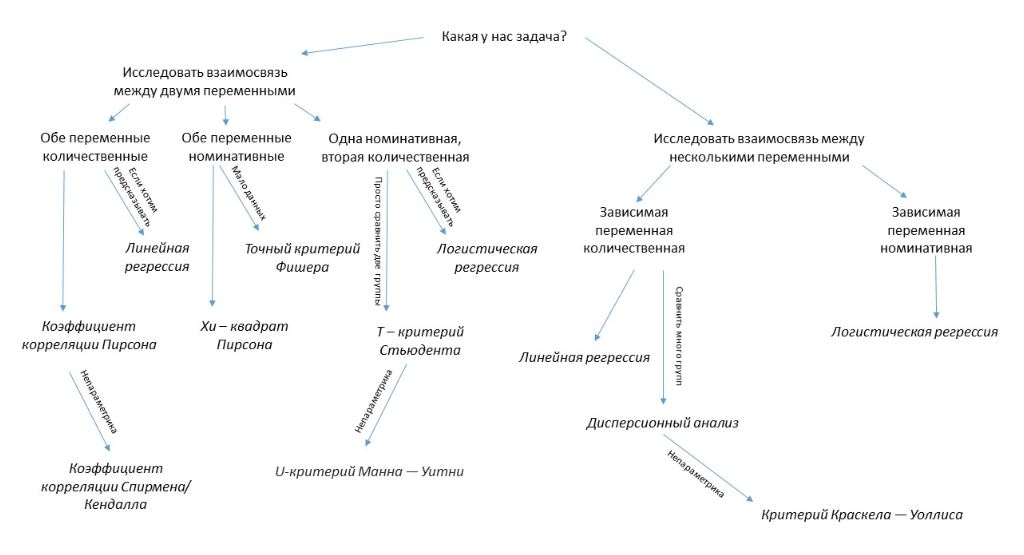


# [Основы статистики (Часть 2)](https://stepik.org/course/524/syllabus)

Автор лекций: **Анатолий Карпов**

Конспект: **EG**

## [1  Анализ номинативных данных](https://stepik.org/lesson/24823/step/1?unit=7113)

### 1.1 Общая информация о курсе


### 1.2 Постановка задачи

### 1.3 Расстояние Пирсона

**Критерий χ²-Пирсона**

* H0: Распределение частот не отличимо от ожидаемого
* H1: Распределение частот отличимо от ожидаемого

Задача: Определить, насколько статистически значимы различия между ожидаемыми и эмпирическими значениями

$χ^2 = ∑\frac{(O_i - E_i)^2}{E_i}$

$O_i$ (Observed) - наблюдаемые частоты

$E_i$ (Expected) - ожидаемые частоты


### 1.4 Распределение Хи-квадрат Пирсона

#### Пример с подбрасыванием монеты

In [14]:
def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    n = 60
    for i in range(n):
        if random.randint(0, 1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона:
    d = {'chi': 0, 'eagles': 0, 'tails': 0}
    d['chi'] = (eagles - n / 2) ** 2 / (n / 2) + (tails - n / 2) ** 2 / (n / 2)
    d['eagles'] = (eagles - n / 2) / (n / 2) ** 0.5
    d['tails'] = (tails - n / 2) / (n / 2) ** 0.5
    return d

In [16]:
distance_chi_square_from_toss_coin()

{'chi': 0.26666666666666666,
 'eagles': -0.3651483716701107,
 'tails': 0.3651483716701107}

In [17]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат

arr_of_chi_square, arr_of_chi_square_eagles, arr_of_chi_square_tails = np.array([]), np.array([]), np.array([])

for _ in range(10000):
    tmp_dict = distance_chi_square_from_toss_coin()
    arr_of_chi_square = np.append(arr_of_chi_square, tmp_dict['chi'])
    arr_of_chi_square_eagles = np.append(arr_of_chi_square_eagles, tmp_dict['eagles'])
    arr_of_chi_square_tails = np.append(arr_of_chi_square_tails, tmp_dict['tails'])

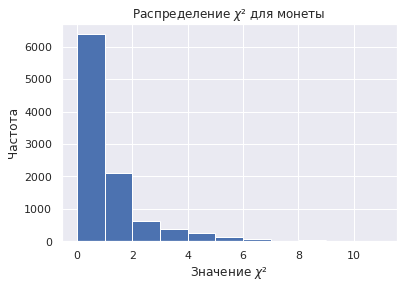

In [18]:
# Распределение хи квадрат
plt.hist(list(arr_of_chi_square), bins=[i for i in range(12)])
plt.title('Распределение $χ²$ для монеты')
plt.xlabel('Значение $χ²$')
plt.ylabel('Частота')
plt.show()

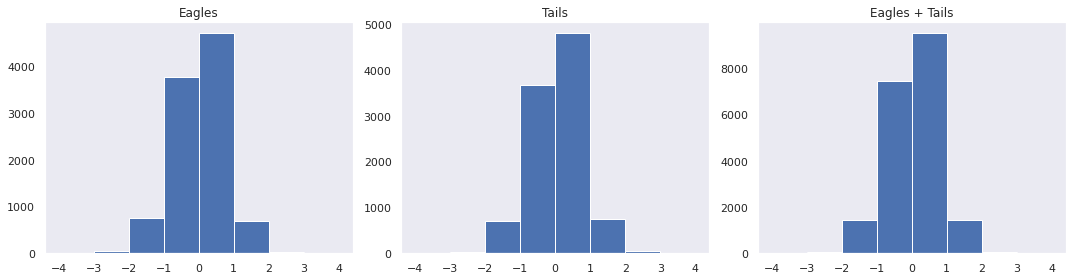

In [19]:
# распределение k величин
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

for i in range(3):
    ax[i].grid()

ax[0].set(title='Eagles')
ax[0].hist(list(arr_of_chi_square_eagles), bins=[i for i in range(-4, 5)])

ax[1].set(title='Tails')
ax[1].hist(list(arr_of_chi_square_tails), bins=[i for i in range(-4, 5)])

ax[2].set(title='Eagles + Tails')
ax[2].hist(list(np.append(arr_of_chi_square_eagles, arr_of_chi_square_tails)), bins=[i for i in range(-4, 5)])

plt.tight_layout()
plt.show()

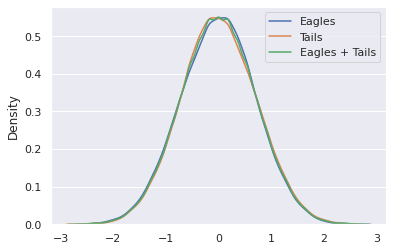

In [ ]:
sns.kdeplot(arr_of_chi_square_eagles, label='Eagles')
sns.kdeplot(arr_of_chi_square_tails, label='Tails')
sns.kdeplot(np.append(arr_of_chi_square_eagles, arr_of_chi_square_tails), label='Eagles + Tails')
plt.legend()
plt.grid(axis='x')
plt.show()

#### Пример с игральной костью

In [20]:
def distance_chi_square_from_dice():
    d = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    # кидаем кубик 60 раз
    n = 60
    for i in range(n):
        x = random.randint(1, 6)
        d[x] = d.get(x, 0) + 1
    # расчитываем расстояние хи-квадрат Пирсона:
    chi = 0
    for i in range(6):
        chi += (d[i + 1] - n / 6) ** 2 / (n / 6)
    d['chi'] = chi
    for i in range(6):
        d[i + 1] = (d[i + 1] - (n / 6)) / (n / 6) ** 0.5
    return d

In [25]:
distance_chi_square_from_dice()

{1: 0.6324555320336759,
 2: -1.5811388300841895,
 3: 0.0,
 4: -0.31622776601683794,
 5: 0.0,
 6: 1.2649110640673518,
 'chi': 4.6}

In [21]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем кидать кость 
# и сохранять возвращаемое значение расстояния хи-квадрат
arr_of_chi_square_dice = np.array([])
arr_of_chi_square_dice1 = np.array([])
arr_of_chi_square_dice2 = np.array([])
arr_of_chi_square_dice3 = np.array([])
arr_of_chi_square_dice4 = np.array([])
arr_of_chi_square_dice5 = np.array([])
arr_of_chi_square_dice6 = np.array([])

for _ in range(10000):
    tmp_dict = distance_chi_square_from_dice()
    arr_of_chi_square_dice = np.append(arr_of_chi_square_dice, tmp_dict['chi'])
    arr_of_chi_square_dice1 = np.append(arr_of_chi_square_dice1, tmp_dict[1])
    arr_of_chi_square_dice2 = np.append(arr_of_chi_square_dice2, tmp_dict[2])
    arr_of_chi_square_dice3 = np.append(arr_of_chi_square_dice3, tmp_dict[3])
    arr_of_chi_square_dice4 = np.append(arr_of_chi_square_dice4, tmp_dict[4])
    arr_of_chi_square_dice5 = np.append(arr_of_chi_square_dice5, tmp_dict[5])
    arr_of_chi_square_dice6 = np.append(arr_of_chi_square_dice6, tmp_dict[6])


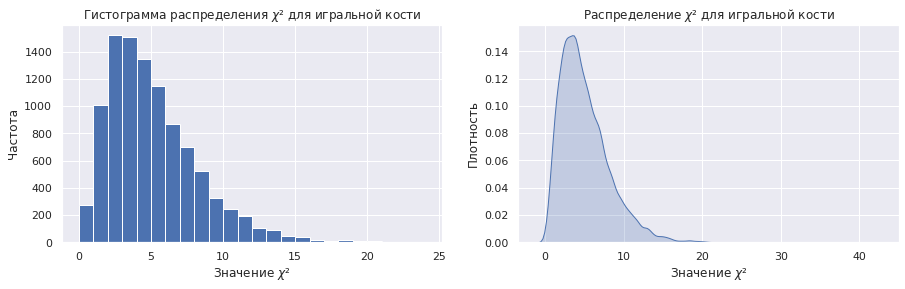

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

ax[0].hist(list(arr_of_chi_square_dice), bins=[i for i in range(25)])
ax[0].set_title('Гистограмма распределения $χ²$ для игральной кости')
ax[0].set_xlabel('Значение $χ²$')
ax[0].set_ylabel('Частота')

sns.kdeplot(arr_of_chi_square_dice, shade=True, ax=ax[1], bw_adjust=0.8, thresh=0.02)

ax[1].set_title('Распределение $χ²$ для игральной кости')
ax[1].set_xlabel('Значение $χ²$')
ax[1].set_ylabel('Плотность')


fig.show()

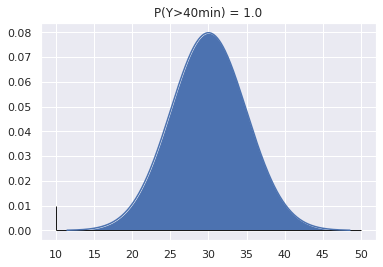

In [ ]:
fig, ax = plt.subplots()

norm_rv = stats.norm(loc=30, scale=5)

x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 300)
ax.plot(x, norm_rv.pdf(x))

thresh = 10

ax.fill_between(x[x>thresh], norm_rv.pdf(x[x>thresh]), np.zeros(len(x[x>thresh])))
p = 1 - norm_rv.cdf(thresh)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.hlines(0, 10, 50, lw=1, color='k')
ax.vlines(thresh, 0, 0.01, color='k', lw=1);

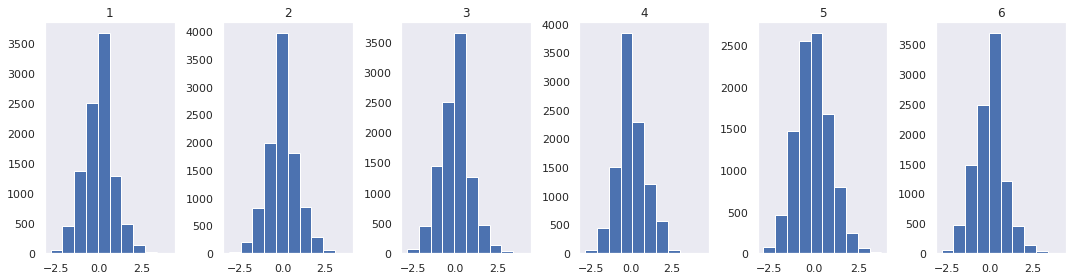

In [ ]:
# распределение k величин
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,4))

for i in enumerate([arr_of_chi_square_dice1,
                    arr_of_chi_square_dice2,
                    arr_of_chi_square_dice3,
                    arr_of_chi_square_dice4,
                    arr_of_chi_square_dice5,
                    arr_of_chi_square_dice6]):
    ax[i[0]].grid()
    ax[i[0]].set(title=i[0] + 1)
    ax[i[0]].hist(i[1])

plt.tight_layout()
plt.show()

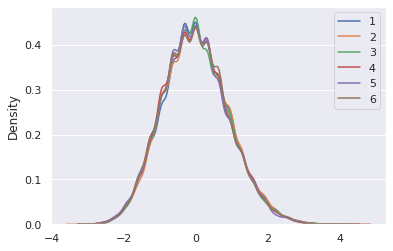

In [ ]:
for i in enumerate([arr_of_chi_square_dice1,
                    arr_of_chi_square_dice2,
                    arr_of_chi_square_dice3,
                    arr_of_chi_square_dice4,
                    arr_of_chi_square_dice5,
                    arr_of_chi_square_dice6]):
    sns.kdeplot(i[1], label=i[0]+1)

plt.legend()
plt.grid(axis='x')
plt.show()

**Распределение χ² с k степенями свободы** (k - сумма слагаемых) — распределение суммы квадратов $k$ независимых стандартных (со средним $M_z = 0$ и дисперсией $D_z = 1$) случайных величин, распределённых нормальным образом.

#### Зависимость распределения хи-квадрат от количества степеней свободы $k$

* Ось x: значение хи-квадрат
* Ось y: плотность распределения

(далее вместо $k$ будет использоваться $df$ - degrees of freedom).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Chi-square_distributionPDF.png/1024px-Chi-square_distributionPDF.png' width=300>

Для эксперимента с монетой степень свободы $df = 1$.

Для эксперимента с игральной костью степень свободы $df = 5$.

[Почему df = N - 1?](https://stepik.org/lesson/24814/step/10?unit=7105)
При заданном количестве значений только `N - 1` значений будут независимы, зная их все, последнюю `1` мы всегда можем предсказать, следовательно 1 значение всегда не независимо от других и его не следует учитывать.

### 1.5 Расчет p-уровня значимости

Расчёт p-value - [Online-калькулятор для вычисления p-value](https://gallery.shinyapps.io/dist_calc/) (**Distribution - Chi-Squared**)

#### [Task 1.5.1](https://stepik.org/lesson/26445/step/6?thread=solutions&unit=8327)

Какая доля наблюдений лежит в диапазоне от $2$ до $4$ у распределения `хи-квадрат` с двумя степенями свободы?

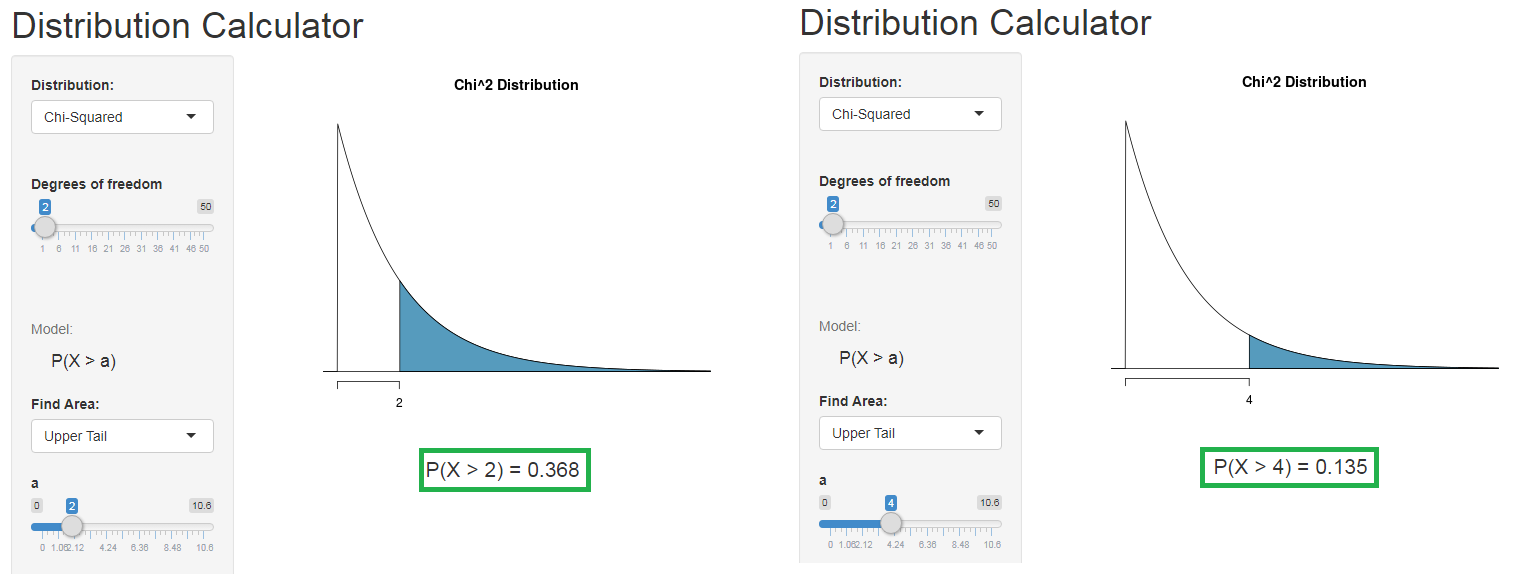

In [ ]:
# from scipy import stats

a = stats.chi2.sf(4, 2)
b = stats.chi2.sf(2, 2)

print(f'{round(b, 3)} - {round(a, 3)} = {round(b - a, 3)}')
print(f'В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит {b - a:.1%} наблюдений.')

0.368 - 0.135 = 0.233
В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит 23.3% наблюдений.


#### [Task 1.5.2](https://stepik.org/lesson/26445/step/7?thread=solutions&unit=8327)

Теперь рассчитаем `p-уровень значимости` для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

$10, 10, 10, 5, 10, 15$

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся `p-уровень значимости`.

In [ ]:
res = [10, 10, 10, 5, 10, 15]
n = 60

chi = 0
for i in range(6):
    chi += (res[i] - n / 6) ** 2 / (n / 6)

p = round(stats.chi2.sf(chi, 5), 3)

print(f'chi={chi}, p = {p}')
print('p > 0.05: Нет оснований для отклонения нулевой гипотезы' if p > 0.05 else 'p < 0.05: Отклоняем нулевую гипотезу')

chi=5.0, p = 0.416
p > 0.05: Нет оснований для отклонения нулевой гипотезы


#### [Task 1.5.3](https://stepik.org/lesson/26445/step/8?thread=solutions&unit=8327)

<img src='https://ucarecdn.com/2b6c82a0-2779-41f4-b179-419a22715a28/'>

In [ ]:
res = [10, 30, 50]
n = sum(res)

chi = 0
for i in range(3):
    chi += (res[i] - n / 3) ** 2 / (n / 3)

p = round(stats.chi2.sf(chi, 5), 8)

print(f'chi={round(chi, 3)}, p = {p}')
print('p < 0.05: Отклоняем нулевую гипотезу' if p < 0.05 else 'p > 0.05: НЕ отклоняем нулевую гипотезу')

chi=26.667, p = 6.623e-05
p < 0.05: Отклоняем нулевую гипотезу


#### [Task 1.5.4](https://stepik.org/lesson/26445/step/9?thread=solutions&unit=8327)

Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: $15$ юношей и $9$ девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас `p-уровень значимости`.

In [ ]:
stats.chisquare([15, 9], [12, 12])

Power_divergenceResult(statistic=1.5, pvalue=0.22067136191984324)

#### [Task 1.5.5](https://stepik.org/lesson/26445/step/10?thread=solutions&unit=8327)

В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос $1500$ граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. $53\%$ опрошенных респондентов оценили разоблачение положительно.

При помощи теста **хи-квадрат** проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть $50$ на $50$.

Введите в ответ получившийся `p-уровень значимости` для проверки этой гипотезы. 

In [ ]:
stats.chisquare([795, 705])

Power_divergenceResult(statistic=5.4, pvalue=0.02013675155034633)

### 1.6 Анализ таблиц сопряженности

* H0: Распределение частот не отличимо от ожидаемого

* H1: Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой



$f_{ij} = \frac{f_i \cdot f_j}{N}$, где

$f_{ij}$ - ожидаемое значение

$f_{i}$ - сумма в строке

$f_{j}$ - сумма в столбце

$N$ - количество наблюдений в выборке

#### Example 1.6.1

Исследование наличия взаимосвязи между двумя номинативными переменными

In [ ]:
example_df = pd.DataFrame({'Boys': [15, 11], 'Girls': [9, 6]}, index=['Biology', 'CS'])
example_df

,Boys,Girls
Biology,15,9
CS,11,6


In [ ]:
boys_sum = example_df['Boys'].sum()
girls_sum = example_df['Girls'].sum()
bio_sum = example_df.loc['Biology'].sum()
cs_sum = example_df.loc['CS'].sum()

print(f'{boys_sum} - количество мальчиков')
print(f'{girls_sum} - количество девочек')
print(f'{bio_sum} - количество биологов')
print(f'{cs_sum} - количество информатиков')

26 - количество мальчиков
15 - количество девочек
24 - количество биологов
17 - количество информатиков


In [ ]:
e_bio_boys = round(bio_sum * boys_sum / (boys_sum + girls_sum), 2)
e_cs_boys = round(cs_sum * boys_sum / (boys_sum + girls_sum), 2)
e_bio_girls = round(bio_sum * girls_sum / (boys_sum + girls_sum), 2)
e_cs_girls = round(cs_sum * girls_sum / (boys_sum + girls_sum), 2)


print(f'{e_bio_boys} - ожидаемое количество мальчиков биологов')
print(f'{e_cs_boys} - ожидаемое количество мальчиков информатиков')
print(f'{e_bio_girls} - ожидаемое количество девочек биологов')
print(f'{e_cs_girls} - ожидаемое количество девочек информатиков')

15.22 - ожидаемое количество мальчиков биологов
10.78 - ожидаемое количество мальчиков информатиков
8.78 - ожидаемое количество девочек биологов
6.22 - ожидаемое количество девочек информатиков


In [ ]:
# Таблица ожидаемых частот в соответствии с нулевой гипотезой
expected_df = pd.DataFrame({'Boys': [e_bio_boys, e_cs_boys], 'Girls': [e_bio_girls, e_cs_girls]}, index=['Biology', 'CS'])
expected_df

,Boys,Girls
Biology,15.22,8.78
CS,10.78,6.22


In [ ]:
# решение задачи при помощи модуля scipy.stats
#from scipy import stats
observed_array = [[15, 11], [9, 6]]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно удалить из формулы и ничего не изменится

print(f'\nОжидаемые значения:\n{expected_array}')
print()
print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')


Ожидаемые значения:
[[15.2195122 10.7804878]
 [ 8.7804878  6.2195122]]

Хи-квадрат = 0.021 
p-value = 0.885 
df = 1


#### Task 1.6.1

В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.

<table>
    <tbody>
        <tr>
            <th class="wysiwyg-tmp-selected-cell"> </th>
            <th>Первая градация фактора X</th>
            <th>Вторая градация фактора X</th>
        </tr>
        <tr>
            <td>Первая градация фактора Y</td>
            <td>10</td>
            <td>6</td>
        </tr>
        <tr>
            <td>Вторая градация фактора Y</td>
            <td>5</td>
            <td>15</td>
        </tr>
    </tbody>
</table>

В поле для ответа напишите максимальное значение из четырех ожидаемых частот.

In [ ]:
task1_df = pd.DataFrame({'X_col': [10, 5], 'Y_col': [6, 15]}, index=['X_row', 'Y_row'])
task1_df

,X_col,Y_col
X_row,10,6
Y_row,5,15


In [ ]:
X_col = task1_df['X_col'].sum()
Y_col = task1_df['Y_col'].sum()
X_row = task1_df.loc['X_row'].sum()
Y_row = task1_df.loc['Y_row'].sum()

e_Xc_Xr = round(X_row * X_col / (X_col + Y_col), 2)
e_Xc_Yr = round(Y_row * X_col / (X_col + Y_col), 2)
e_Yc_Xr = round(X_row * Y_col / (X_col + Y_col), 2)
e_Yc_Yr = round(Y_row * Y_col / (X_col + Y_col), 2)

print(max([e_Xc_Xr, e_Xc_Yr, e_Yc_Xr, e_Yc_Yr]))

11.67


In [ ]:
# решение задачи при помощи модуля scipy.stats
# from scipy import stats
observed_array = [[10, 5], [6, 15]]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно удалить из формулы и ничего не изменится

print(f'\nОжидаемые значения:\n{expected_array}')
#print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')


Ожидаемые значения:
[[ 6.66666667  8.33333333]
 [ 9.33333333 11.66666667]]


### 1.7 Анализ таблиц сопряженности. Продолжение

Для поиска взаимосвязи между номинативными переменными, применяем критерий $χ^2$ - Пирсона, который проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого. И рассчитываем $p-value$ со степенями свобод, равными:

$df = (n - 1) \cdot (m - 1)$, где

$n$ - количество столбцов таблицы, $m$ - количество строк


В теории распределение χ² непрерывно, тогда как вычисляемые значения всегда дискретны, в результате **H0** может отвергаться слишком часто. Чтобы скорректировать значение $p$-уровня значимости применяется **Поправка Йетса** на непрерывность. (Используется для анализа таблицы сопряженности **два на два**, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше $5$, но меньше $10$).

$χ^2_{Yates} = ∑\frac{(|f_O - f_E| - 0.5)^2)}{f_E}$

где $f_O$ - эмпирическое значение в ячейке, $f_E$ - ожидаемое значение в ячейке

#### Расчет хи-квадрат и p-value в Python

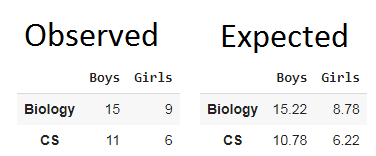

$χ^2_{Yates} = \frac{(|15.22 - 15| - 0.5) ^ 2}{15.22} + \frac{(|8.78 - 9| - 0.5) ^ 2}{8.78} + \frac{(|10.78 - 11| - 0.5) ^ 2}{10.78} + \frac{(|6 - 6.22| - 0.5) ^ 2}{6.22}$

In [ ]:
# расчет вручную
chi_sq = (abs(e_bio_boys - example_df.loc['Biology', 'Boys']) - 0.5) ** 2 / e_bio_boys + \
      (abs(e_cs_boys - example_df.loc['CS', 'Boys']) - 0.5) ** 2 / e_cs_boys + \
      (abs(e_bio_girls - example_df.loc['Biology', 'Girls']) - 0.5) ** 2 / e_bio_girls + \
      (abs(e_cs_girls - example_df.loc['CS', 'Girls']) - 0.5) ** 2 / e_cs_girls

round(chi_sq, 4)

0.034

In [ ]:
# решение задачи при помощи модуля scipy.stats
observed_values = [[15, 9], [11, 6]]
chi2, p_value, df, expected = stats.chi2_contingency(observed_values)

print(f'{df} - количество степеней свободы')  # степени свободы
print(f'\nОжидаемые значения:\n{expected}')  # ожидаемые значения
print()
print(f'{round(chi2, 4)} - Хи-квадрат')  # Хи-квадрат
print(f'{round(p_value, 4)} - p-value')  # p-value

1 - количество степеней свободы

Ожидаемые значения:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]

0.0341 - Хи-квадрат
0.8535 - p-value


Условия применения хи квадрата Пирсона:
* все наблюдения независимы
* в каждой ячейке минимальное значение **ожидаемых** частот должно быть больше пяти (иначе нарушается предположение о нормальном распределении переменных).

#### Интерпретретация остатков

**Анализ остатков** (разница между ожидаемыми и эмпирическими значениями) позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений.

Если значения стандартизированных остатков больше $3$, можно считать, что в этой ячейке зафиксированы значимые отклонения.

#### [Task 1.7.1, 1.7.2](https://stepik.org/lesson/26448/step/7?unit=8330)

Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.

<img src='https://ucarecdn.com/fd5dfb7a-4de4-4e78-bfb1-c3fb2a5943e0/' width=350>

1. Чему равняется число степеней свободы в нашем случае?
2. Введите получившейся p - уровень значимости.

In [ ]:
# решение задачи при помощи модуля scipy.stats
observed_values = [[20, 11, 7], [15, 12, 9]]
chi2, p_value, df, expected = stats.chi2_contingency(observed_values)

print(f'{df} - количество степеней свободы')  # степени свободы
print(f'\nОжидаемые значения:\n{expected}')  # ожидаемые значения
print()
print(f'{round(chi2, 4)} - Хи-квадрат')  # Хи-квадрат
print(f'{round(p_value, 4)} - p-value')  # p-value

2 - количество степеней свободы

Ожидаемые значения:
[[17.97297297 11.81081081  8.21621622]
 [17.02702703 11.18918919  7.78378378]]

0.9544 - Хи-квадрат
0.6205 - p-value


#### [Task 1.7.3](https://stepik.org/lesson/26448/step/9?thread=solutions&unit=8330)

При проверке гипотезы о взаимосвязи двух номинативных переменных с двумя градациями (таблица сопряженности два на два), если на самом деле верна нулевая гипотеза и никакой взаимосвязи между переменными в генеральной совокупности нет, то справедливы следующие утверждения:

* Число степеней свободы будет равняться одному - **Да**
> $df=(n-1)\cdot(m-1) = (2-1)\cdot(2-1) = 1$

* Распределение статистики хи-квадрат будет близким к нормальному - **Нет**
> Выполняется для большого количества степеней свободы  - см. [Online-калькулятор для вычисления p-value](https://gallery.shinyapps.io/dist_calc/) (Distribution - Chi-Squared)

* Распределение статистики хи-квадрат будет иметь максимум в 2 - **Нет**
> Максимум в двойке выполняется для df=4  

* Около 5% значений хи-квадрат будут превышать 5.9 - **Нет**
> Утверждение не является верным, т.к. оно выполняется для $df=2$. Для $df=1$ пороговое значение хи-квадрат $3.84$

* Распределение статистики хи-квадрат будет обладать значительной асимметрией - **Да**
> Смотри график хи-распределения для $df=1$

#### [Example 1.7.1](https://stepik.org/lesson/26448/step/10?unit=8330)

In [ ]:
# from scipy import stats
# import numpy as np

observed = np.array([[18, 7], [6, 13]])
chi2, p, df, expected = stats.chi2_contingency(observed)
print(f'\nОжидаемые значения:\n{expected}')
print('x-squared =', round(chi2, 3))
print('p-value =', round(p, 4))
print('df =', df)


Ожидаемые значения:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]
x-squared = 5.577
p-value = 0.0182
df = 1


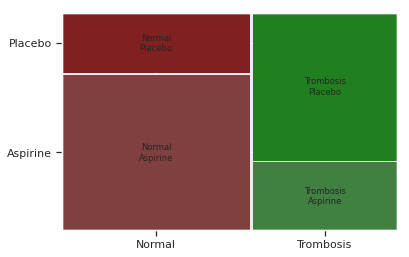

In [ ]:
# from statsmodels.graphics.mosaicplot import mosaic

pill_data = {('Normal', 'Aspirine'): 18, 
             ('Normal', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13
            }
# Значения 18, 7, 6, 13 являются входными значениями и соответсвуют таблице observed_array = [[18, 7], [6, 13]]

my_plot = mosaic(pill_data, gap=.009)

# Ширина прямоугольников соответствует количеству наблюдений
# Высота прямоугольников соответствует отклонению ожидаемых и наблюдаемых частот в этой ячейке

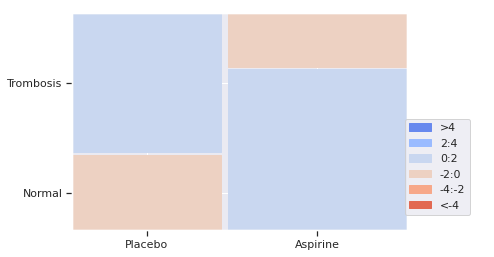

In [ ]:
# второй вариант построения графика с цветовой градацией

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = stats.chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
make_me_plot(data)

### 1.8 Точный критерий Фишера

В случае когда размер выборки очень маленький и наблюдений в каждой из ячеек недостаточно (**ожидаемых** частот должно быть меньше пяти), используется точный критерий Фишера (вероятность получения набора данных):

$$\frac {C^a_{a+b}*C^c_{c+d}}{C^{a+c}_n}$$

$C$ - количество сочетаний без повторений

$C^m_{n} = \frac{n!}{m!(n-m)!} = \frac{A^m_{n}}{m!}$

**Вывод формулы критерия Фишера**

Лекарство    | Поправился         | Не поправился | Сумма 
-------------|--------------------|---------------|------
Лекарство №1 | a                  |b              |a + b
Лекарство №2 | c                  |d              |c + d
Сумма        | a + c              |b + d          |n



Нулевая гипотеза: вероятности поправиться от лекарства №1 и №2 одинаковы

$H_0: p_1 = p_2 = p$

$X$ - количество поправившихся от лекарства №1

$Y$ - количество поправившихся от лекарства №2

$P(X=a) = C^a_{a+b} \cdot p^a \cdot (1-p)^b$ - вероятность выздоровления от лекарства №1 при $a + b$ пациентах

$P(Y=c) = C^c_{c+d} \cdot p^c \cdot (1-p)^d$ - вероятность выздоровления от лекарства №2 при $c + d$ пациентах

$P(X+Y=a+c) = C^{a+c}_{n} \cdot p^{a+c} \cdot (1-p)^{b+d}$ - вероятность выздоровления для всей выборки

$P(X=a | X+Y=a+c) = \frac{P(X=a, X+Y=a+c)}{P(X+Y=a+c)} = \frac{P(X=a) \cdot P(Y=c)}{P(X+Y=a+c)}$

$P(X=a | X+Y=a+c) = \frac{C^a_{a+b} \cdot p^a \cdot (1-p)^b \cdot C^c_{c+d} \cdot p^c \cdot (1-p)^d}{C^{a+c}_{n} \cdot p^{a+c} \cdot (1-p)^{b+d}}$

$P(X=a | X+Y=a+c) = \frac {C^a_{a+b} \cdot C^c_{c+d}}{C^{a+c}_n}$

$P(X=a | X+Y=a+c) = \frac {C^3_{3+1} \cdot C^1_{1+3}}{C^{3+1}_8} \approx 0.229$

Для расчета $p-value$ необходимо добавить вероятность возникновения более сильно выраженного события, т.е. $a = 4, b = 0, c=0, d=4$ и умножить на $2$:

$\frac {C^4_{4+0} \cdot C^0_{0+4}}{C^{4+0}_8} \approx 0.014$

$p-value = (0.229 + 0.014) * 2 \approx 0.49$

#### Расчет критерия Фишера в Python

In [ ]:
#from scipy import stats
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(f'odds_ratio: {round(odds_ratio, 3)}, p_value: {round(p_value, 3)}')

odds_ratio: 0.111, p_value: 0.486


#### Условия применения критериев хи-квадрат и Фишера

**Критерий хи-квадрат** - Анализ таблицы сопряженности произвольного размера, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 10

**Критерий хи-квадрат с поправкой Йетса** - Анализ таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10

**Точный критерий Фишера** - Анализ таблицы сопряженности, в которой экстремально мало наблюдений, т.е. если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений

### 1.9 Практические задания на R

#### [Task 1.9.1](https://stepik.org/lesson/26186/step/2?unit=8128)

Напишите функцию `NA_position`, которая получает на вход два числовых вектора одинаковой длины. Функция должна возвращать `TRUE`, если позиции `NA` в обоих векторах совпадают или пропущенных значений вообще нет, и значение `FALSE`, если позиции `NA` в векторах не совпадают.

```
> v1  <- c(1, 2, 3)
> v2  <- c(3, 4, 6)
> NA_position(v1, v2)
[1] TRUE

> v1  <- c(1, 2, NA)
> v2  <- c(3, 4, NA)
> NA_position(v1, v2)
[1] TRUE

> v1  <- c(NA, 2, NA)
> v2  <- c(3, 4, NA)
> NA_position(v1, v2)
[1] FALSE
```

In [ ]:
def NA_position(v1, v2):
    return np.array_equal(np.argwhere(np.isnan(v1)), np.argwhere(np.isnan(v2)))

In [ ]:
for v1, v2 in ([1, 2, 3], [1, 2, 3]), ([1, 2, np.nan], [3, 4, np.nan]), ([np.nan, 2, np.nan], [3, 4, np.nan]):
    print(NA_position(v1, v2))

True
True
False


#### [Task 1.9.2](https://stepik.org/lesson/26186/step/3?unit=8128)

Напишите функцию `smart_test`, которая получает на вход dataframe с двумя номинативными переменными с произвольным числом градаций. Функция должна проверять гипотезу о независимости этих двух переменных при помощи **критерия хи - квадрат** или **точного критерия Фишера**.

Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше $5$ наблюдений, функция должна рассчитывать **точный критерий Фишера** и возвращать вектор из одного элемента: получившегося **p - уровня значимости**.

Если наблюдений достаточно для расчета **хи-квадрат** (во всех ячейках больше либо равно 5 наблюдений), тогда функция должна применять **критерий хи-квадрат** и возвращать вектор из трех элементов: **значение хи-квадрат, число степеней свободы,  p-уровня значимости**.

Примеры работы функции:

```
# Достаточно наблюдений в таблице
> table(mtcars[,c("am", "vs")])
   vs
am   0  1
  0 12  7
  1  6  7
> smart_test(mtcars[,c("am", "vs")])
[1] 0.3475355 1.0000000 0.5555115


# Недостаточно наблюдений в таблице
> table(mtcars[1:20,c("am", "vs")])
   vs
am  0 1
  0 8 6
  1 2 4
> smart_test(mtcars[1:20,c("am", "vs")])
[1] 0.628483
```


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Основы статистики_2/mtcars.csv')

In [ ]:
df.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [ ]:
new_df = df[['am', 'vs']]  # create subset
new_df.head(3)

,am,vs
0,1,0
1,1,0
2,1,1


In [ ]:
def smart_test(test_data):
    table = pd.crosstab(test_data.iloc[:, 1], test_data.iloc[:, 0])  # create cross table
    if table.min().min() >= 5:
        chi2, p_value, df, expected = stats.chi2_contingency(table)
        return pd.DataFrame({'X-squared': [chi2], 'df': [df], 'p_value': [p_value]}, index=['chisq'])
    else:
        odds_ratio, p_value = stats.fisher_exact(table)  # odds_ratio - отношение шансов
        return pd.DataFrame({'p_value': [p_value]}, index=['fisher'])

In [ ]:
smart_test(new_df)

,X-squared,df,p_value
chisq,0.347536,1,0.555512


In [ ]:
smart_test(new_df.head(20))

,p_value
fisher,0.628483


#### [Task 1.9.3](https://stepik.org/lesson/26186/step/4?unit=8128)

Почувствуй себя биоинформатиком!  Вся наследственная информация в живых организмах хранится внутри молекулы ДНК. Эта молекула состоит из последовательности четырех "букв" — A, T, G и C. 

Напишите функцию `most_significant`, которая получает на вход dataframe с произвольным количеством переменных, где каждая переменная это нуклеотидная последовательность. 

Cкачайте тестовый набор данных (смотри ниже), чтобы познакомиться с их структурой, на которых будет тестироваться ваша функция. Рассмотрим пример, всего-лишь с несколькими наблюдениями, чтобы прояснить суть задачи:

```
   V1 V2 V3
1  A  A  C
2  G  G  A
3  C  C  C
4  T  T  A
5  G  T  T
6  T  A  G
```

В этом примере три последовательности V1, V2, V3.

Для каждой переменной мы можем проверить нулевую гипотезу о том, что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости каждого нуклеотида отличается от равномерного.

Функция должна возвращать вектор с **названием переменной (или переменных)**, в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном распределении нуклеотидов при помощи критерия хи - квадрат. 

In [26]:
df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")

In [54]:
def most_significant(test_data):
    d = {}
    for column in test_data.columns:
        d[column] = stats.chisquare(test_data[column].value_counts())[1]
    return sorted(d.items(), key=lambda x: x[1])[0][0]

In [55]:
most_significant(df)

'V3'

## [2  Логистическая регрессия и непараметрические методы](https://stepik.org/lesson/26512/step/1?unit=8377)

### 2.1 Логистическая регрессия. Постановка задачи.

[Как легко понять логистическую регрессию](https://habr.com/ru/company/io/blog/265007/)

**Логистическая регрессия** используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего $2$ градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).

Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

$[0, 1] \ni p_i = \beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2, i} + ... + \beta_k x_{k, i} \in (-\infty, +\infty)$

Чтобы $p_i$ принимала значения от 0 до 1:

$p_i = \frac {exp(\beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2, i} + ... + \beta_k x_{k, i})}{1 + exp(\beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2, i} + ... + \beta_k x_{k, i})}$

**Odds (шансы)** $= p / (1 - p) ∈ [0; +∞)$ - это отношение вероятности успеха ($p$) к вероятности неудачи $(1 - p)$ , 

#### Пример

Орел выпал 2 раза, решка выпала 8 раз

$p = \frac {2}{2 + 8} = 0.2$ - вероятность выпадания орла 2 раза

$odds = \frac {p}{1-p} = \frac {0.2}{1-0.2} = 0.25$

**Основное логарифмическое тождество:**

$e^{ln(a)} = a$

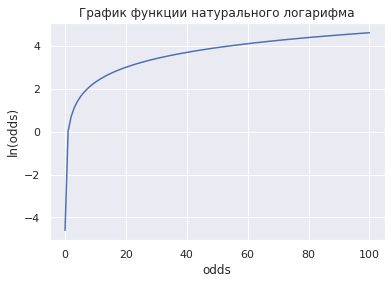

In [ ]:
x = np.linspace(0.01, 100, 100)
y = np.log(x)

sns.lineplot(x=x, y=y)
plt.xlabel('odds')
plt.ylabel('ln(odds)')
plt.title('График функции натурального логарифма')
plt.show()

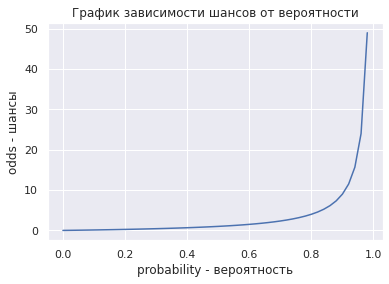

In [ ]:
p = np.linspace(0.0001, 0.98, 50)
odds = p / (1 - p)

sns.lineplot(x=p, y=odds)
plt.xlabel('probability - вероятность')
plt.ylabel('odds - шансы')
plt.title('График зависимости шансов от вероятности')
plt.show()

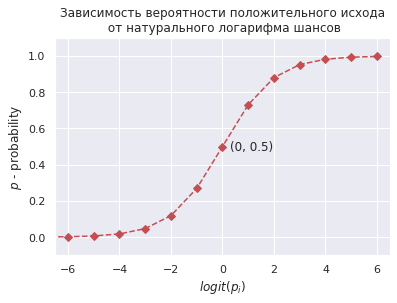

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

x = np.arange(-7, 7, 1) # логарифм шансов
y = np.exp(x) / (1 + np.exp(x)) # вероятность положительного исхода

plt.plot(x, y, 'rD--')
plt.xlim(-6.5, 6.5)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности положительного исхода\n от натурального логарифма шансов', fontsize=12)
plt.xlabel('$logit(p_i)$', fontsize=12)
plt.ylabel('$p$ - probability', fontsize=12)

plt.text(0 + 0.3, 0.5 - 0.025, '(0, 0.5)')

plt.show()

$logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_1 \cdot x_1$

$p = \frac {exp(\beta_0 + \beta_1 \cdot x_1)}{1 + exp(\beta_0 + \beta_1 \cdot x_1)} $

#### [Task 2.1.1](https://stepik.org/lesson/26512/step/3?unit=8377)

Уравнение регрессии:

$ln(odds) = 3.3 - 3.7*SexMale - 0.88*PclassSecond - 3.46*PclassThird - 0.42*SexMale*PclassSecond + 2.15*SexMale*PclassThird$

In [ ]:
# Вероятность выжить для мужчины из третьего класса приблизительно равняется 0.15
log_odds = 3.3 - 3.7 - 3.46 + 2.15
odds = math.exp(log_odds)
p = odds / (1 + odds)
p

0.15316371576508614

Шанс выжить для женщин в первом классе приблизительно в 4 раза выше чем у мужчин из первого класса

In [ ]:
# Шанс выжить для женщин в первом классе приблизительно в 4 раза выше чем у мужчин из первого класса
log_odds_w = 3.3
log_odss_m = 3.3 - 3.7

math.exp(log_odds_w) / math.exp(log_odss_m)

40.4473043600674

#### Task 2.1.2

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

Чтобы не запутаться, давайте в этом задании рассматривать как "успех" - выпадение решки.

In [ ]:
import math

p = (100 - 70) / 100
odds = p / (1 - p)
print(f'ln(odds): {round(math.log(odds), 3)}')

ln(odds): -0.847


#### Task 2.1.3

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:

In [ ]:
p = math.exp(-1) / (1 + math.exp(-1))
print(f'p: {round(p, 2)}')

p: 0.27


#### Task 2.1.4

Вернемся к уже знакомым нам данным.

<img src='https://ucarecdn.com/37e900e5-2477-4354-b877-ceba2b088562/'>

Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом.

In [ ]:
example_df = pd.DataFrame({'Boys': [15, 11], 'Girls': [9, 6]}, index=['Biology', 'CS'])
example_df

,Boys,Girls
Biology,15,9
CS,11,6


In [ ]:
bio_sum = example_df.loc['Biology'].sum()
full_sum = example_df.sum().sum()

print(f'{bio_sum} - количество биологов')
print(f'{full_sum} - общее количество студентов')

24 - количество биологов
41 - общее количество студентов


In [ ]:
p = bio_sum / full_sum
odds = p / (1 - p)
print(f'ln(odds): {round(math.log(odds), 3)}')

ln(odds): 0.345


### 2.2 Модель без предикторов. Intercept only model

Модель без предикторов описывается уравнением:

$y = intercept$ (одному числу, без предикторов)

$Intercept$ - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число:

$log(\frac {p}{1-p} ) = intercept$

#### Пример

В датасете Титаника выжило $290$ человек, погибло - $424$.

$p = 290 / (290 + 424) \approx 0.406$ - вероятность выживания

$odds = \frac{290}{424} \approx 0.683$ или  $odds = \frac{p}{1-p}$ - шанс выживания

$intercept = ln(odds) = -0.379$ или $intercept = ln(\frac{p}{1-p})$ - натуральный логарифм шансов положительного исхода

$e^{ln(-0.379)} = 0.683$

In [ ]:
p = 290 / (290 + 424)
odds = 290 / 424  # или odds = p /(1 - p)
intercept = math.log(odds)

print(f'intercept={round(intercept, 3)} - натуральный логарифм шансов положительного исхода')

intercept=-0.38 - натуральный логарифм шансов положительного исхода


**Результат расчета модели без предикторов в R:**



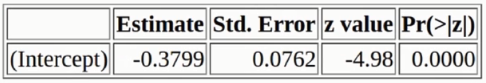

Интерпретация расчётной таблицы:

* **Estimate** - значение свободного члена регрессии `intercept` (логарифм шанса положительного исхода)
* Полученная в расчётах стандартная ошибка (`se`) - это стандартное отклонение, которое имело бы нормальное распределение коэфициента `intercept` со средним равным $0$
* Тогда если разделить значение коэфициента `intercept` на стандартную ошибку, то получим `z-value` – расстояние до $0$ в стандартных отклонениях.
* `Pr(>|z|)` - значение p-value, т.е. вероятность получить такое или ещё более сильное отличие `intercept` от $0$ при условии, что верна нулевая гипотеза $H_0$

In [ ]:
np.log(0.04/ (1 - 0.04))

-3.1780538303479453

#### [Task 2.2.1](https://stepik.org/lesson/26554/step/8?unit=8405)

С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было $50$ студентов. Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен $-0.8472979$. Сколько человек всё-таки сдало экзамен?

In [ ]:
n = 50
intercept = -0.8472979
odds = np.exp(intercept)
p = odds / (1 + odds)

print(f'{int(round(p * n, 3))} человек сдали экзамен')

15 человек сдали экзамен


### 2.3 Модель с одним номинативным предиктором

#### Example

Таблица зависимостей шансов выжить у мужчин и женщин:

In [ ]:
df_23 = pd.DataFrame({'Female': [64, 197], 'Male': [360, 93]}, index=['No', 'Yes'])
df_23

,Female,Male
No,64,360
Yes,197,93


In [ ]:
odds_male = df_23['Male']['Yes'] / df_23['Male']['No']  # шансы выжить у мужчин
odds_female = df_23['Female']['Yes'] / df_23['Female']['No']  # шансы выжить у женщин

print(f'{round(odds_male, 2)} - odds_male')
print(f'{round(odds_female, 2)} - odds_female')

0.26 - odds_male
3.08 - odds_female


In [ ]:
# натуральный логарифм шансов положительного исхода для женщин
intercept = math.log(odds_female)
print(f'{round(intercept, 4)} - intercept')

1.1243 - intercept


In [ ]:
# коэф-т при Х - натуральный логарифм отношения шансов положительного исхода
# для мужчин и шансов для женщин
odds_ratio = odds_male / odds_female # эквивалент: math.log(odds_male) - math.log(odds_female)
print(f'{round(math.log(odds_ratio), 4)} - math.log(odds_ratio)')

-2.4778 - math.log(odds_ratio)


#### Пример решения в statsmodels

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

category_columns = { col: 'category' for col in ['Survived', 'Sex']}  # приведение выбранных колонок к категориальному

data = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv', dtype=category_columns)

data = data[data.Age.notnull()] # удаление строк с отсутствующими значениями в колонке Age

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c сдвумя градациями нужно трансформировать в 2 колонки для каждого пола
X = sm.add_constant(data.loc[:,'Sex'].cat.codes)

# ВЫЧИСЛЯЕМ  
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()

# Можно и так (кто привык к R)
glm_binom_rstyle = smf.glm(formula="Survived ~ Sex", data=data, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()

print(res.summary())
print()
print(res_rstyle.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Wed, 11 Aug 2021   Deviance:                       750.70
Time:                        06:49:52   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.144      7.814      0.0

#### [Task 2.3.1](https://stepik.org/lesson/26555/step/4?unit=8403)

In [ ]:
odds_female + odds_ratio

3.1620505499153975

#### [Task 2.3.3](https://stepik.org/lesson/26555/step/6?thread=solutions&unit=8403)

In [ ]:
odds_female/odds_male  # эквивилент 1 / odds_ratio

11.91532258064516

Я думаю, что вы без труда уловили основную идею того, как мы рассчитываем коэффициенты для данной регрессионной модели. Однако у вас может остаться законный вопрос: зачем все так усложнять? Почему значения коэффициентов при номинативных переменных - это логарифм отношения шансов, то есть логарифм дроби? Здесь нам на помощь придет свойство логарифмов, и я надеюсь, все станет еще более интуитивным!

Вернемся к результатам нашей модели:

<img src='https://ucarecdn.com/e171d7de-6677-4b9f-a274-f027ca845c53/-/crop/381x101/0,42/-/preview/'>


Уравнение регрессии может быть записано следующим образом:

$\ln(odds) = Intercept + b_{1}*SexMale$

Значение `intercept` - это логарифм шансов выжить для женщин:  

$Intercept=\ln(\frac{p_{выжить}}{1 - p_{выжить}})=\ln(odds_{женщин})$

Значение коэффициента при $SexMale$ - это логарифм отношения шансов выжить для мужчин и шансов выжить для женщин, но по свойству логарифмов мы можем представить логарифм отношения как разность логарифмов:

$b_{1}=\ln(\frac{odds_{мужчин}}{odds_{женщин}}) =\ln(odds_{мужчин}) - \ln(odds_{женщин})$

Таким образом, коэффициент при $SexMale$ - это разность логарифмов шансов. Иными словами, как я выразился в лекции, это цена перехода с одной градации нашего признака на другую!

Давайте еще раз рассмотрим задачу предсказания. Если новый пассажир - женщина, тогда значение переменной $SexMale = 0$, и мы получим логарифм шансов для женщин:

$\ln(odds_{женщина}) = \ln(odds_{женщин}) + 0*(\ln(odds_{мужчин}) - \ln(odds_{женщин})) = \ln(odds_{женщин})$

Теперь, сделаем предсказание для пассажира мужчины, в этом случае $SexMale = 1$, шансы для женщин сократятся, и мы получим шансы для мужчин:

$\ln(odds_{мужчина}) = \ln(odds_{женщин}) + 1*(\ln(odds_{мужчин}) - \ln(odds_{женщин}))\\\hspace{55pt}= \ln(odds_{женщин}) +\ln(odds_{мужчин}) - \ln(odds_{женщин})\\\hspace{55pt}= \ln(odds_{мужчин})$

### Пример решения в statsmodels

In [ ]:
# выживаемость по классам
glm_binom = smf.glm(
    formula="Survived ~ C(Pclass)"
    , data=data
    , family=sm.families.Binomial()).fit()
print(glm_binom.aic)

875.810262243976


In [ ]:
category_columns = {col: 'category' for col in ['Survived', 'Pclass']}  # приведение выбранных колонок к категориальному

data = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv', dtype=category_columns)

data = data[data.Age.notnull()] # удаление строк с отсутствующими значениями в колонке Age

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c сдвумя градациями нужно трансформировать в 2 колонки для каждого пола
X = sm.add_constant(data.loc[:,'Pclass'].cat.codes)

# ВЫЧИСЛЯЕМ  
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()

# Можно и так (кто привык к R)
glm_binom_rstyle = smf.glm(formula="Survived ~ C(Pclass)", data=data, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()

print(res.summary())
print()
print(res_rstyle.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -435.37
Date:                Wed, 11 Aug 2021   Deviance:                       870.73
Time:                        06:49:53   Pearson chi2:                     713.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7085      0.141      5.027      0.0

### 2.4 Модель с двумя номинативными предикторами

Таблицы зависимостей шансов выжить у мужчин и женщин в зависимости от класса:

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/y_n_f_m_1_2_3.png'>

На графике:

<img src='https://nbviewer.jupyter.org/github/FyoklaBorschova/math_stat/blob/master/pictures/gr_y_n_f_m_1_2_3.jpg'>

Интерпретация таблицы:

<img src='https://ucarecdn.com/6dcfc27b-b3a0-4ada-a645-649c7911acc9/' width=450>

**Intercept** – логарифм шансов положительного исхода для женщин в первом классе.

**SexMale** — логарифм отношения шансов для мужчин в первом классе и женщин в первом классе.

**PclassSecond** — логарифм отношения шансов для женщин во втором классе и женщин в первом классе.

**PclassThird** — логарифм отношения шансов для женщин в третьем классе и женщин в первом классе.

**SexMale:PclassSecond** — разность логарифмов отношения шансов, рассчитанного для мужчин и женщин в первом классе и во втором классе.

**SexMale:PclassThird** — разность логарифмов отношения шансов рассчитанного для мужчин и женщин в первом и в третьем классе.

#### [Task 2.4.2](https://stepik.org/lesson/26557/step/6?unit=8404)

Intercept = 0.5
DrugsDrug2 = 1.0
SexMale = 4.0



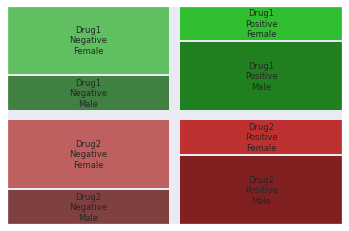

In [ ]:
# from statsmodels.graphics.mosaicplot import mosaic

data = {
    ('Drug2', 'Negative', 'Male'  ): 1,
    ('Drug2', 'Positive', 'Male'  ): 2,
    ('Drug2', 'Negative', 'Female'): 2,
    ('Drug2', 'Positive', 'Female'): 1,
           
    ('Drug1', 'Negative', 'Male'  ): 1,
    ('Drug1', 'Positive', 'Male'  ): 2,
    ('Drug1', 'Negative', 'Female'): 2,
    ('Drug1', 'Positive', 'Female'): 1,
}

ax = mosaic(data, horizontal=0, gap=.05, axes_label=0)

odds_F_Pos_Drug1 = data[('Drug1', 'Positive', 'Female')] / \
                   data[('Drug1', 'Negative', 'Female')]
odds_F_Neg_Drug1 = 1 / odds_F_Pos_Drug1
odds_M_Pos_Drug1 = data[('Drug1', 'Positive', 'Male')] / \
                   data[('Drug1', 'Negative', 'Male')]
odds_M_Neg_Drug1 = 1 / odds_M_Pos_Drug1
odds_F_Pos_Drug2 = data[('Drug2', 'Positive', 'Female')] / \
                   data[('Drug2', 'Negative', 'Female')]

print(f'Intercept = {odds_F_Pos_Drug1}')
print(f'DrugsDrug2 = {odds_F_Pos_Drug2 / odds_F_Pos_Drug1}')
print(f'SexMale = {odds_M_Pos_Drug1 / odds_F_Pos_Drug1}')
print()

### 2.5 Взаимодействие номинативных предикторов

Уравнение регрессии:

$ln(odds) = 3.3 - 3.7*SexMale - 0.88*PclassSecond - 3.46*PclassThird - 0.42*SexMale*PclassSecond + 2.15*SexMale*PclassThird$

#### Пример расчета уравнения регрессии.

На входе мужчина из третьего класса:
* SexMale = 1
* PclassThird = 1

$ln(odds) = 3.3 - 3.7*1 - 0.88*0 - 3.46*1 - 0.42*1*0 + 2.15*1*1 \approx - 1.73$

#### [Task 2.5.1](https://stepik.org/lesson/24822/step/5?unit=7112)

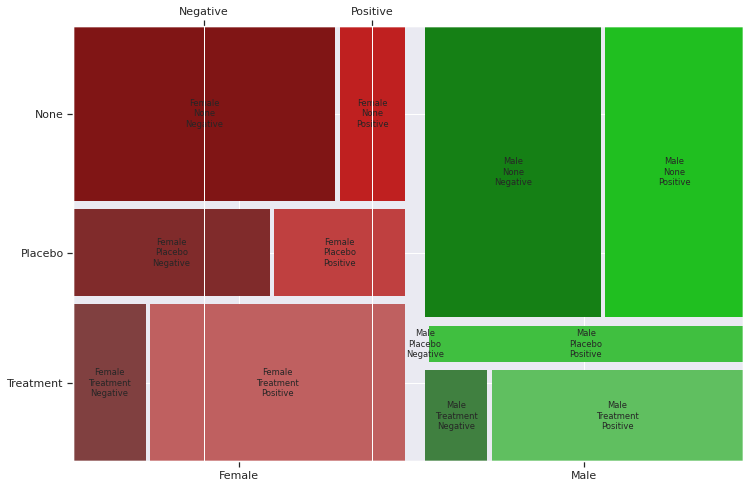

In [ ]:
# from statsmodels.graphics.mosaicplot import mosaic

data = {
    ('Female', 'Treatment', 'Negative'): 2,
    ('Female', 'Treatment', 'Positive'): 7,
    ('Male'  , 'Treatment', 'Negative'): 1,
    ('Male'  , 'Treatment', 'Positive'): 4,
    ('Female', 'Placebo'  , 'Negative'): 3,
    ('Female', 'Placebo'  , 'Positive'): 2,
    ('Male'  , 'Placebo'  , 'Negative'): 0,
    ('Male'  , 'Placebo'  , 'Positive'): 2,
    ('Female', 'None'     , 'Negative'): 8,
    ('Female', 'None'     , 'Positive'): 2,
    ('Male'  , 'None'     , 'Negative'): 9,
    ('Male'  , 'None'     , 'Positive'): 7,
}

fig, ax = plt.subplots(figsize=(12, 8))
mosaic(data, gap=.03, ax=ax)  # , axes_label=1, 
plt.show()

#### [Task 2.5.2](https://stepik.org/lesson/24822/step/6?unit=7112)

$ln(odds) = -1.15 + 0.8 * SexMale + 0.82 * Placebo + 2.13 * Treatment + 16.11 * Placebo * SexMale - 0.17 * SexMale * Treatment$

In [ ]:
log_odds = -1.15 + 0.8 * 1 + 2.13 * 1 - 0.17 * 1 * 1
odds = math.exp(log_odds)
p = odds / (1 + odds)
p

0.8334113864245404

### 2.6 Когда нужно использовать непараметрические методы и почему?

[**Непараметрические (или свободные от распределения) методы статистического вывода**](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0) являются математическими процедурами для проверки статистических гипотез, которые, в отличие от [параметрической статистики](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0), не делают предположений о вероятностных распределениях оцениваемых переменных. Такие методы носят название непараметрических статистических критериев.

[**Непараметрические методы**](https://rsmu.ru/fileadmin/templates/DOC/Faculties/PF/Phys-mat/Stat_Hypoth.pdf) – это количественные методы статистической обработки
данных, применение которых не требует знания закона распределения изучаемых
признаков в совокупности и вычисления их основных параметров. Например,
**непараметрической** является гипотеза о равенстве генеральных средних значений двух
совокупностей, если нет информации о виде законов распределения измеряемой
величины.

#### [Example 2.6.1 Идея метода Шапиро-Уилко](https://stepik.org/lesson/26821/step/3?unit=8556)

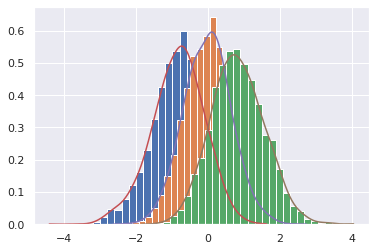

In [ ]:
# import numpy as np
# import scipy.stats as ss
# import matplotlib.pyplot as plt

def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки
        :param dataset: массив значений
    '''
    density = stats.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density


mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины

# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)

# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')

# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)

plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))

plt.show()

#### Визуализация центральной предельной теоремы

[Central Limit Theorem for Means](https://gallery.shinyapps.io/CLT_mean/)

### 2.7 Непараметрические методы. Продолжение.

#### U-критерий Манна — Уитни

*Непараметрический аналог t-критерия Стьюдента. Используется для оценки различий между двумя независимыми выборками, в которых признак измерен в метрической или ранговой шкале.*



Самым популярным непараметрическим критерием для сравнения двух групп является **U-критерий Манна — Уитни**. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает **сумму рангов** (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

 Затем для каждой из выборок рассчитывается показатель:

$U_{1} = R_{1} - \frac{n_{1} \cdot (n_{1}+1)}{2}$

$U_{2} = R_{2} - \frac{n_{2} \cdot (n_{2}+1)}{2}$
​

Где $R_{1}, R_{2}$ - это сумма рангов в двух группах, а $n_{1},n_{2}$ - число наблюдений.

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где 

$\mu=\frac{n_{1} \cdot n_{2}}{2}$ и $\sigma=\sqrt{\frac{n_{1} \cdot n_{2} \cdot (n_{1}+n_{2}+1)}{12} }$
​
что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

**Разумно применять вместо t - теста:**

1. Распределения хотя бы в одной из выборок значительно отличается от нормального. 
2. Есть заметные выбросы в данных. 
3. В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении).

**Неразумно применять:**

* Выборки разного размера, с различным направлением асимметрии.  

#### Критерий Краскела-Уоллиса

Если при сравнении трёх и более групп нарушаются требования и к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - **критерий Краскела-Уоллиса**.

Упрощая, можно сказать, что **критерий Манна-Уитни** сравнивает усредненный ранг в двух группах. Разность среднего значения рангов в двух группах можно описать при помощи нормального распределения.

Основная статистика **критерия Краскела-Уоллиса** - это дисперсия средних значений рангов в сравниваемых группах. При верности нулевой гипотезы распределение этой статистики можно описать при помощи распределения **Хи - квадрат**:

$H = \frac{12}{N \cdot (N+1)} \overset{k} {\underset{i=1} \sum} \frac{R^2_i}{n_i} - 3(N+1)$

$N = \overset{k} {\underset{i=1} \sum} n_i$

$R_i$ - ранг $i$-й группы

**Разумно применять:**
* В сравниваемых группах распределение выборок значительно отличается от нормального, а также нарушается предположение о гомогенности дисперсий.


#### Выбор метода

[What statistical test should I use](https://yatani.jp/teaching/doku.php?id=hcistats:start#what_statistical_test_should_i_use)

[Choosing a statistical test](https://www.graphpad.com/support/faqid/1790/)

<img src='https://ucarecdn.com/1f8e468c-3c7a-4a03-a231-681752080368/'>

[PDF](https://stepik.org/media/attachments/course/524/%D0%9F%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F1.pdf)

## [3  Кластерный анализ и метод главных компонент](https://stepik.org/lesson/24819/step/1?unit=7109)

### 3.1 Кластерный анализ методом k - средних

[Video 1](https://stepik.org/lesson/24819/step/2?unit=7109)

[Video 2](https://stepik.org/lesson/24819/step/3?unit=7109)

[Video 3](https://stepik.org/lesson/24819/step/4?unit=7109)

[Video 4](https://stepik.org/lesson/24819/step/5?unit=7109)

Метод кластерного анализа относится к группе методов "обучение без учителя". Это значит, что никто не знает правильного ответа на интересующий нас вопрос и нет никакой обратной связи.

**Постановка задачи:** Разбить данные на группы

**Кластерный анализ** - анализирует наблюдения (по строкам), и отвечает на вопросы, есть ли в данных подгруппы/кластеры испытуемых и сколько таких кластеров лучше выделить.

**Метод главных компонент** - анализирует наблюдения (по столбцам), и отвечает на вопрос можно ли сократить размерность данных, объединив некоторые из них в группы (интегративные переменные).

**Алгоритм метода k-средних:**

1. Сами решаем на сколько кластеров будем делить.
2. Случайно выбираем начальные позиции центроидов кластера.
3. Для каждого наблюдения определяем, к какому центроиду он ближе всего.
4. Обновим позиции центроидов (среднее по каждой переменной для группы).
5. Если принадлежности некоторых точек изменились, то пункт 4, иначе алгоритм сошелся.

**Центроиды** - геометрические центры предполагаемых кластеров с координатами [ср.значение переменной OX в границах кластера; ср.значение переменной OY в границах кластера]

[Визуализация метода](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

В методе существует элемент случайности. При многократном повторении кластеризации на одних и тех же данных мы можем получать различные варианты кластерного решения. Чем менее явно представлена в наших данных кластерзация наблюдений, тем более существенными могут оказаться различия.

Возможно метод сойдется не очень удачно: метод “увяз” в локальном минимуме.

**Решения:**

* Начальные точки брать наиболее далеко друг от друга;
* Провести кластерный анализ много раз с разными начальными позициями. (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно)

**Оптимальное число кластеров**

Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ, каждый раз выделяя разное количество кластеров и каждый раз записывать значение общей внутрикластерной суммы квадратов.

Если добавление одного кластера в наши данные значительно понижает общую сумму квадратов, то в увелечении числа кластеров есть смысл. Когда последующее увеличение кластеров уже не оказывает такого сильного влияния, значит мы нашли оптимальное число кластеров.

Если при увелечении числа кластеров плавное снижение общей внтуригрупповой суммы квадратов, то значит нет явной класторной структуры в данных.

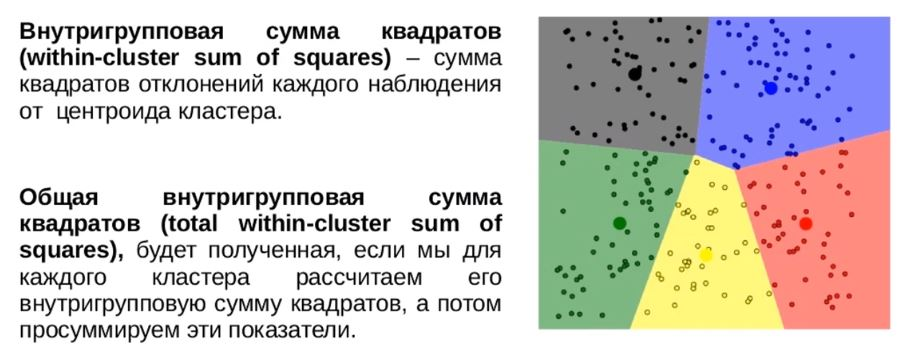

#### Расчёт внутригрупповой суммы квадратов в Python

#### Task 3.1.1

Центроиды будут центральным понятием в последующих лекциях! Давайте убедимся, что мы с вами правильно понимаем, где они располагаются. 

Рассмотрим пример данных, где каждое наблюдение характеризуется двумя переменными X и Y. Рассчитайте координаты центроида наблюдений, изображенных на графике. В поле для ответа введите координаты получившейся точки.

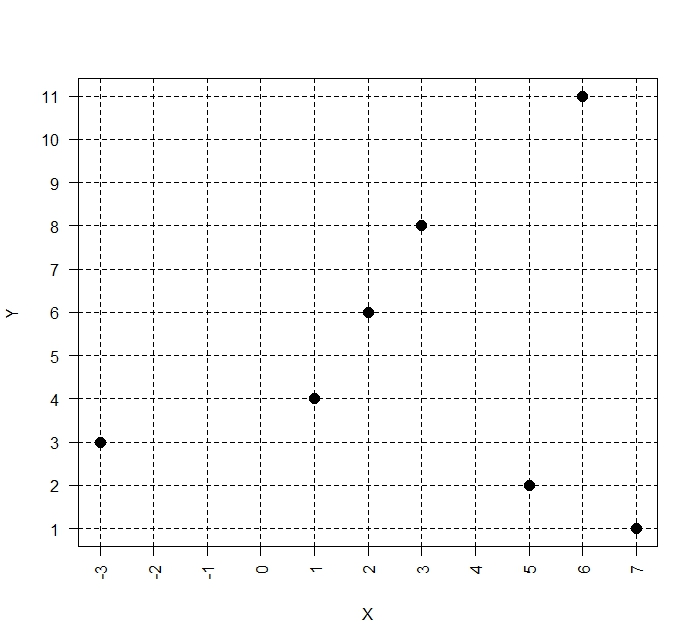

In [ ]:
# from sklearn.cluster import KMeans
#import numpy as np

X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])  # координаты точек в виде массива numpy

kmeans = KMeans(n_clusters=1).fit(X)  # Обучим модель KMeans на нашем массиве с одним кластером

print(f'Координаты центроида данного кластера: {kmeans.cluster_centers_}')
print(f'Сумма квадратов расстояний точек от центроида: {kmeans.inertia_}')

Координаты центроида данного кластера: [[3. 5.]]
Сумма квадратов расстояний точек от центроида: 146.0


**Пример с двумя кластерами**

In [ ]:
# from sklearn.cluster import KMeans
#import numpy as np

X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])  # координаты точек в виде массива numpy

kmeans = KMeans(n_clusters=2).fit(X)  # Обучим модель KMeans на нашем массиве с одним кластером

print(f'Координаты центроида данного кластера: {kmeans.cluster_centers_}')
print(f'Сумма квадратов расстояний точек от центроида: {kmeans.inertia_}')

Координаты центроида данного кластера: [[2.4 3.2]
 [4.5 9.5]]
Сумма квадратов расстояний точек от центроида: 83.0


In [ ]:
df = pd.DataFrame(data = {'x': [i[0] for i in X], 'y': [i[1] for i in X], 'label': kmeans.labels_})  # create dataframe with labels column

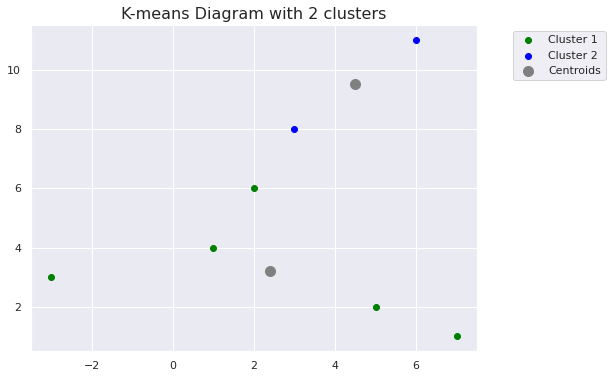

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df[df.label == 0].x, df[df.label == 0].y, c="green", label='Cluster 1')  # 1st cluster is green
ax.scatter(df[df.label == 1].x, df[df.label == 1].y, c="blue", label='Cluster 2')   # 2nd cluster is blue
ax.scatter([i[0] for i in kmeans.cluster_centers_], [i[1] for i in kmeans.cluster_centers_], c="grey", s=100, label='Centroids')

ax.set_title("K-means Diagram with 2 clusters", fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

#### Кластерный анализ на примере iris

**1 способ**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Основы статистики_2/iris.csv', index_col='Unnamed: 0')

In [ ]:
# X = np.array([i for i in zip(df['Sepal.Length'], df['Petal.Width'])]) 
X = df[['Sepal.Length', 'Petal.Width']].values # координаты точек в виде массива numpy

kmeans = KMeans(n_clusters=3).fit(X)  # Обучим модель KMeans на нашем массиве с тремя кластерами

print(f'Координаты центроида данного кластера: {kmeans.cluster_centers_}')
print(f'Сумма квадратов расстояний точек от центроида: {kmeans.inertia_}')

Координаты центроида данного кластера: [[5.86730769 1.46538462]
 [5.00555556 0.3037037 ]
 [6.84318182 1.98409091]]
Сумма квадратов расстояний точек от центроида: 32.726526159026164


In [ ]:
df['labels'] = kmeans.labels_  # add column with labels

In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,labels
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1


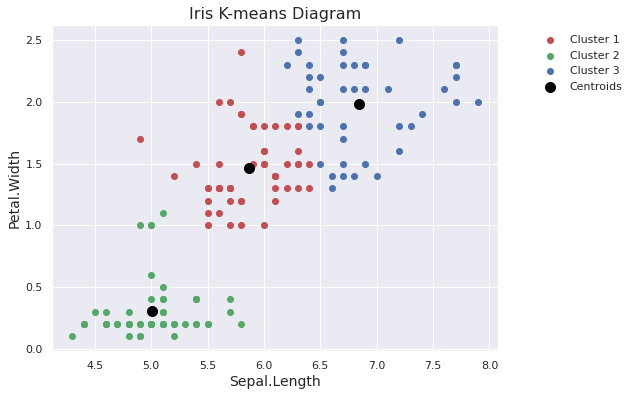

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df[df.labels == 0]['Sepal.Length'], df[df.labels == 0]['Petal.Width'], c="r", label='Cluster 1')  # 1st cluster is red
ax.scatter(df[df.labels == 1]['Sepal.Length'], df[df.labels == 1]['Petal.Width'], c="g", label='Cluster 2')  # 2nd cluster is green
ax.scatter(df[df.labels == 2]['Sepal.Length'], df[df.labels == 2]['Petal.Width'], c="b", label='Cluster 3')  # 3rd cluster is blue

ax.scatter([i[0] for i in kmeans.cluster_centers_], [i[1] for i in kmeans.cluster_centers_], c="black", s=100, label='Centroids')  # add centroids (black points)

ax.set_title("Iris K-means Diagram", fontsize=16)
ax.set_xlabel("Sepal.Length", fontsize=14)
ax.set_ylabel("Petal.Width", fontsize=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

**2 способ**

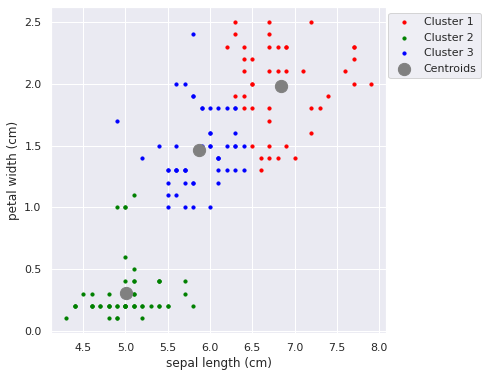

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import pandas as pd

plt.figure(figsize=(6, 6))

# грузим данные 
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[['sepal length (cm)','petal width (cm)']].values

# определяем количество кластеров (равно количеству цветов в легенде)
clusters =('red', 'green', 'blue')
n_clusters = len(clusters)

kmeans = KMeans(n_clusters=n_clusters, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
y_kmeans = kmeans.fit_predict(X)

# отрисовываем группы
for i, color in enumerate(clusters):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=10, c=color, label =f'Cluster {i+1}')
# отрисовываем центроиды
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='grey', label = 'Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

### 3.2 Может ли кластерный анализ "ошибаться"?

Возможно, что в некоторых случая алгоритм K-means будет заканчивать свои манипуляции с данными, хотя результаты будут очевидно неоптимальными.

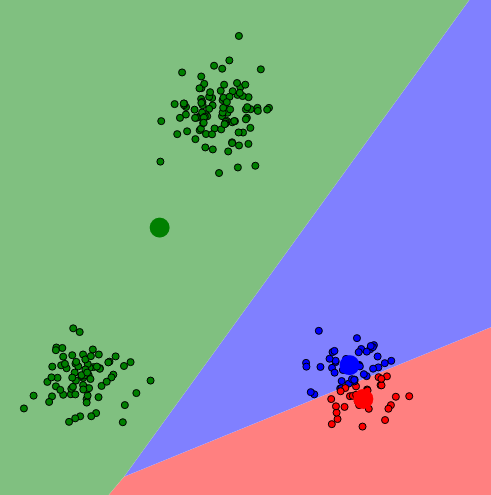

### 3.3 Как определить оптимальное число кластеров?

Для определения оптимального числа кластеров строим график зависимости суммы квадратов расстояний от числа кластеров. Если при увеличении числа кластеров не наблюдается значительного уменьшения суммы квадратов, то это число кластеров является оптимальным.

#### Поиск оптимального числа кластеров на датасете Iris

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

clusters, sum_of_squares = [], []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i).fit(X)
    clusters.append(i)
    sum_of_squares.append(kmeans.inertia_)

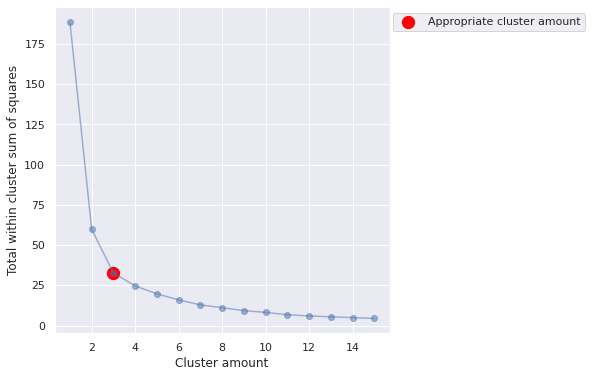

In [ ]:
plt.figure(figsize=(6, 6))

plt.plot(clusters, sum_of_squares, marker="o", alpha=.5)
plt.scatter(clusters[2], sum_of_squares[2], color="red", s=150, label='Appropriate cluster amount')

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.xlabel('Cluster amount')
plt.ylabel('Total within cluster sum of squares')
plt.show()

#### Task 3.3.1

Вернемся к уже знакомым нам наблюдениям:

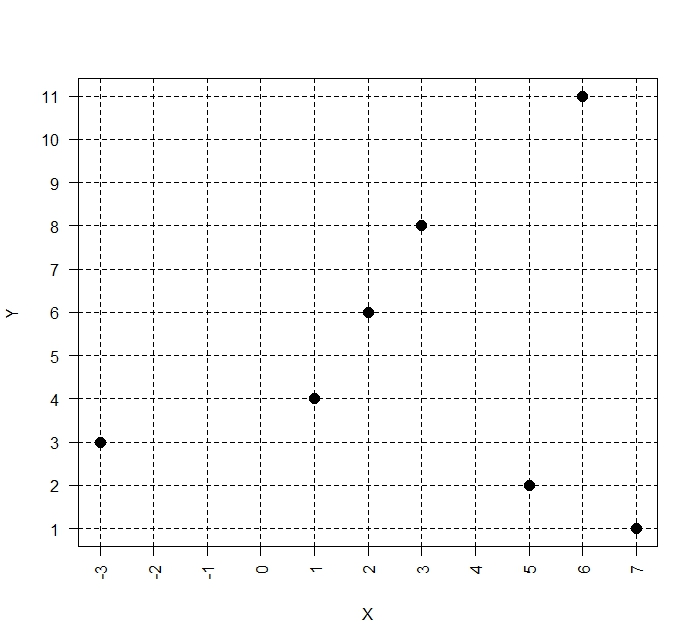

Предположим, это один из кластеров в наших данных, тогда чему будет равняться внутрикластерная сумма квадратов?

In [ ]:
# from sklearn.cluster import KMeans
#import numpy as np

X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])  # координаты точек в виде массива numpy
kmeans = KMeans(n_clusters=1).fit(X)  # Обучим модель KMeans на нашем массиве с одним кластером

print(f'Сумма квадратов расстояний точек от центроида: {kmeans.inertia_}')

Сумма квадратов расстояний точек от центроида: 146.0


### 3.4 Иерархическая кластеризация

**Идея метода:**

* Рассчитывается расстояние от каждой точки до каждой точки
* Производится кластеризация методами иерархической кластеризации, например:
    * *метод одиночной связи* (ближайшего соседа) - Постепенно объединяет две самые близкие точки в кластер, заменяя их центроидом. В первую очередь объединяет самые близкие точки.
    * *метод дальнего соседа* - в последнюю очередь объединяет самые близкие точки.


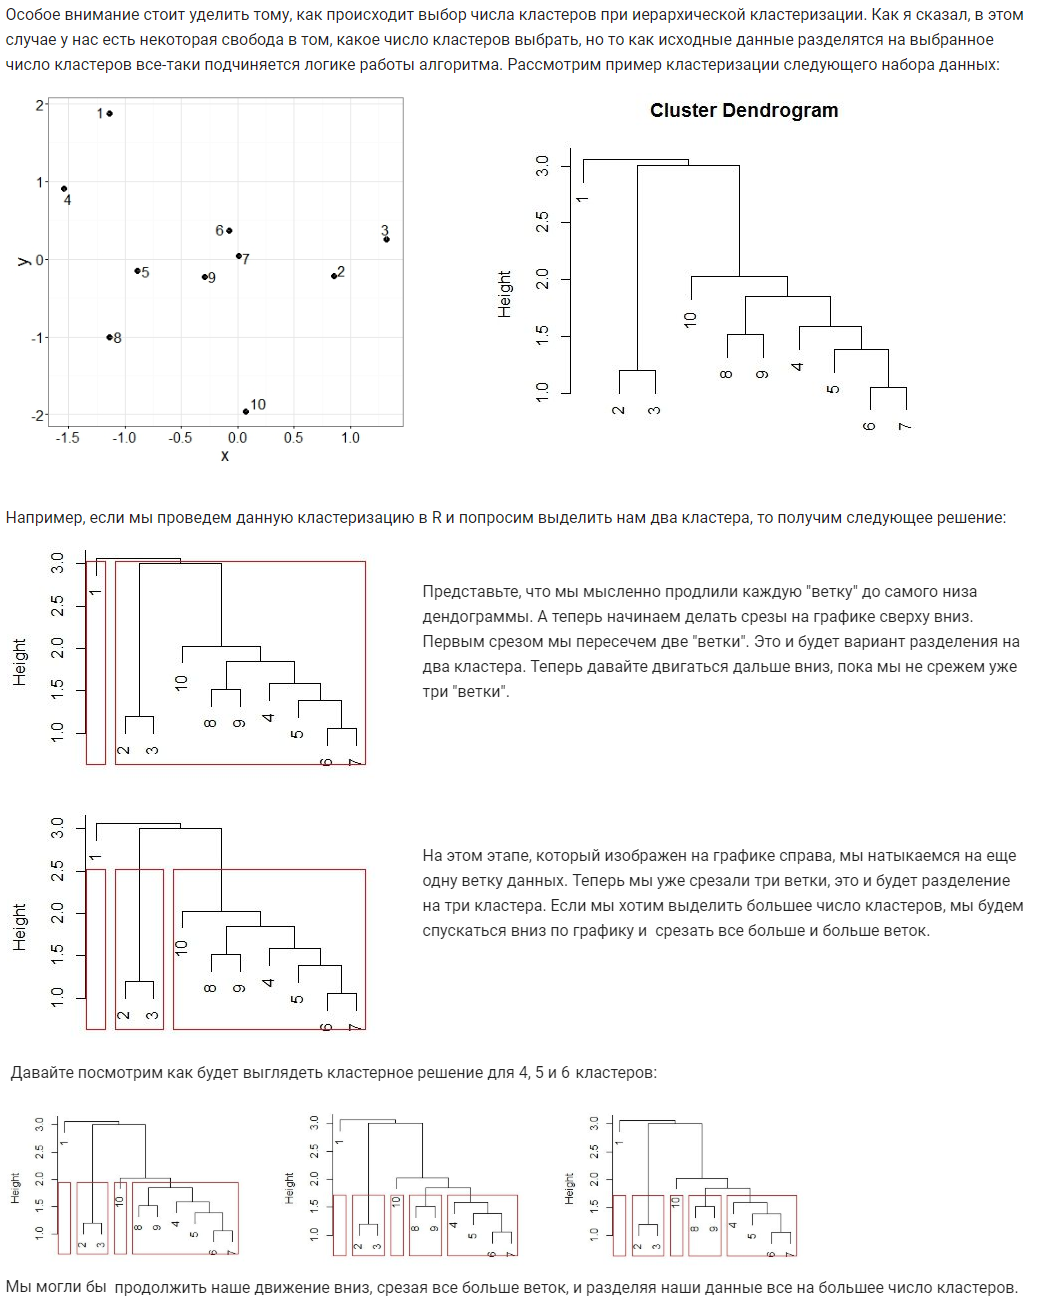

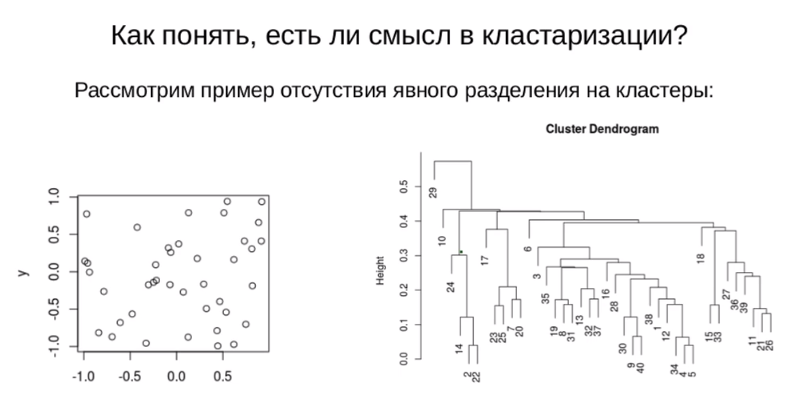

**Методы иерархической кластеризации** и **k-средних** можно комбинировать. Сначала применить метод иерархической кластеризации, оценить полученное количество веток, и использовать это число для метода k-средних.

### 3.5 Введение в метод анализа главных компонент (Principal Component Analysis)

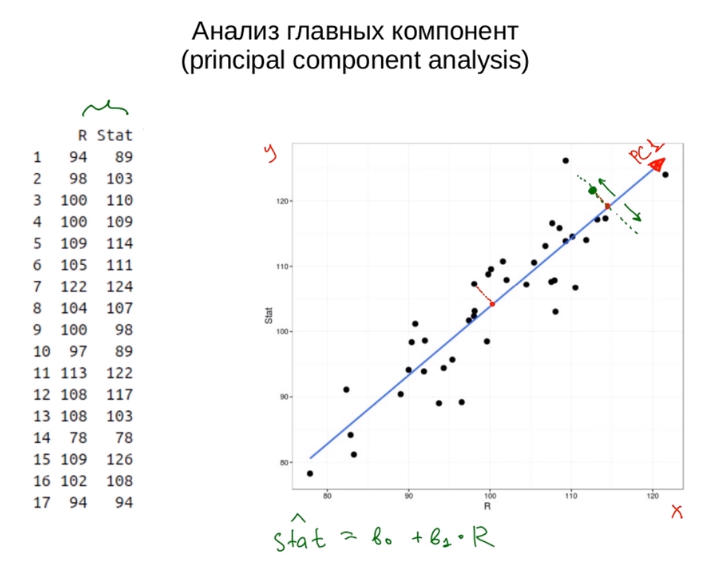

В случае сильной корреляции двух переменных, регрессионная прямая может стать осью главной компоненты (**РС1**). Тогда значения новой интегративной переменной - это проекция (расстояние) на ось **РС1**.

Значения по оси **РС1** - это значения корреляции между двумя переменными. Например, OX-рост OY-вес, тогда **РС1**-конституция тела.

Чем сильнее корреляция между переменными, тем меньше информации потеряется. При этом "знак" отклонения не учитывается, т.е. зная только значение по оси РС1 мы не можем знать, в какую сторону от регресионной прямой отклоняется предсказанное наблюдение.

Информация о "знаке" предсказанного значения может хранится в оси **РС2** - перпендикуляру оси **РС1**. Но с учётом информациии по оси **РС2**, мы увеличиваем процент объяснённой дисперсии всего на $5$%, что позволяет нам не учитывать эту информацию.

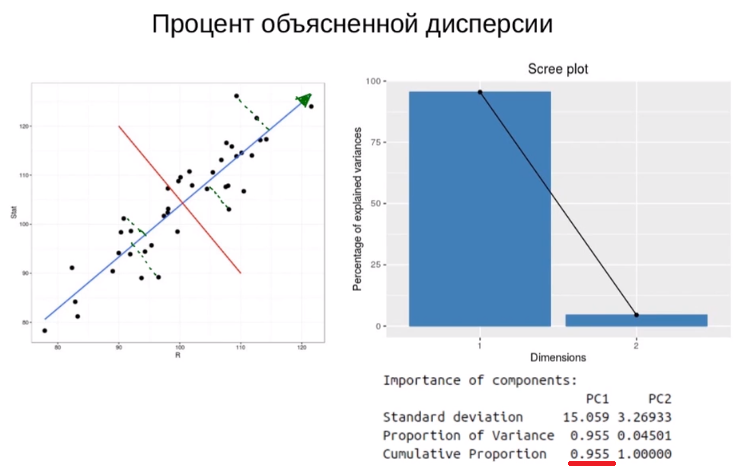

Таким образом, корреляционная прямая, новая ось **РС1**, становится одной новой переменной (интегративной переменной) вместо двух переменных по осям OX и OY. Это позволяет нам снизить размерность данных.

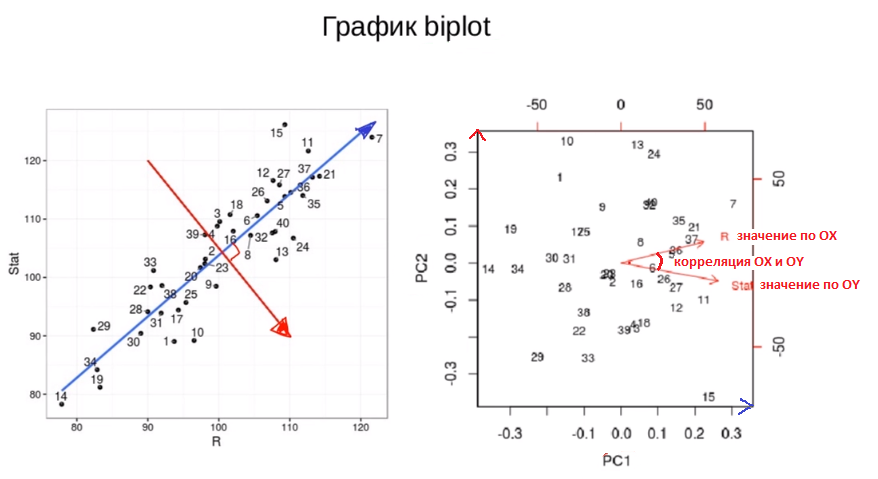

Если на графике biplot угол между переменными равен 90 градусов, значит коэффициент корреляции межу ними равняется нулю.

[Пример анализа главных компонент, когда переменных больше двух](https://stepik.org/lesson/27111/step/6?unit=8681)

#### Факторный анализ

**Факторный анализ** - метод понижения размерности данных. Идея метода заключается в том, что возможно некоторые переменные могут быть сгруппированы в факторы. Фактор - это некоторая латентная переменная, которая объединяет исходные переменные в данных.

Например, если бы в нашей выборке каждый испытуемый характеризовался весом, ростом, силой, знаем английского, знанием немецкого и знанием русского языка. То вероятно, мы смогли бы выделить два фактора: "физическая подготовка" и "знание языков". Разумеется, первые три определяли бы первый фактор, а оставшиеся переменные - второй  фактор.

Давайте посмотрим на основные результаты факторного анализа, примененного к нашим данным `swiss` для того, чтобы выделить два фактора:

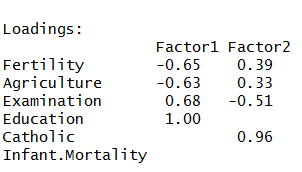

Основные результаты факторного анализа - это факторные нагрузки для каждой переменной. Проводя аналогии с анализом главных компонент, мы можем выяснить какие переменные в большей степени взаимосвязаны между собой и влияют на значения первого фактора, а какие переменные напротив группируются друг с другом и влияют на второй фактор.

В данной таблице видно, что первый фактор - это низкие значения по переменной Fertility, Agriculture но высокие значения переменных Examination и Education. Второй фактор - это наоборот высокие значения по переменным  Fertility, Agriculture, низкие по переменной Examination и максимальный вклад вносит переменная Catholic - то есть процент католического населения.

Таким образом, можно предположить, что за факторизацию наших переменных отвечает два фактора - преобладание протестантского или католического населения.

### 3.6 Практические задания на R

#### Task 3.6.1

Напишите функцию `smart_hclust`, которая получает на вход dataframe  с произвольным числом количественных переменных и число кластеров, которое необходимо выделить при помощи иерархической кластеризации.

Функция должна в исходный набор данных добавлять новую переменную фактор - **cluster**  - номер кластера, к которому отнесено каждое из наблюдений.

Пример работы функции:

```
> test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data_hclust.csv")
> str(test_data)
'data.frame':  12 obs. of  5 variables:
 $ X1: int  11 9 9 9 7 9 16 23 15 19 ...
 $ X2: int  7 10 2 11 9 11 20 18 21 20 ...
 $ X3: int  10 10 12 8 10 9 22 21 14 15 ...
 $ X4: int  10 8 14 10 11 6 19 24 21 17 ...
 $ X5: int  8 6 11 3 14 9 16 16 21 17 ...

> smart_hclust(test_data, 3) # выделено три кластера
   X1 X2 X3 X4 X5 cluster
1  11  7 10 10  8       1
2   9 10 10  8  6       1
3   9  2 12 14 11       1
4   9 11  8 10  3       1
5   7  9 10 11 14       1
6   9 11  9  6  9       1
7  16 20 22 19 16       2
8  23 18 21 24 16       2
9  15 21 14 21 21       3
10 19 20 15 17 17       3
11 20 24 21 20 19       2
12 22 19 27 22 19       2
```

In [ ]:
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/test_data_hclust.csv')

def smart_hclust(data):
    # Вычисляем матрицу расстояний
    Z = linkage(data, method='average', metric='euclidean')
    # Визуализируем иерархическую кластеризацию
    dend = dendrogram(Z, orientation='left')
    # Разбиваем на кластеры; 2й параметр - порог отсечения
    labels = fcluster(Z, 9.5, criterion='distance')
    data['labels'] = labels
    return data

,X1,X2,X3,X4,X5,labels
0,11,7,10,10,8,1
1,9,10,10,8,6,1
2,9,2,12,14,11,2
3,9,11,8,10,3,1
4,7,9,10,11,14,2
5,9,11,9,6,9,1
6,16,20,22,19,16,4
7,23,18,21,24,16,4
8,15,21,14,21,21,3
9,19,20,15,17,17,3


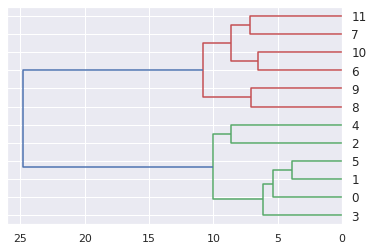

In [ ]:
smart_hclust(data)